# 有向无环图与拓扑排序

在本教程中，我们将探讨 NetworkX 中实现的有向无环图（或简称“DAG”）相关算法，这些算法位于 [`networkx/algorithms/dag.py`](https://github.com/networkx/networkx/blob/main/networkx/algorithms/dag.py) 文件中。

首先，我们需要了解什么是有向图。

## 导入包

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import inspect

%matplotlib inline

## 示例：有向图

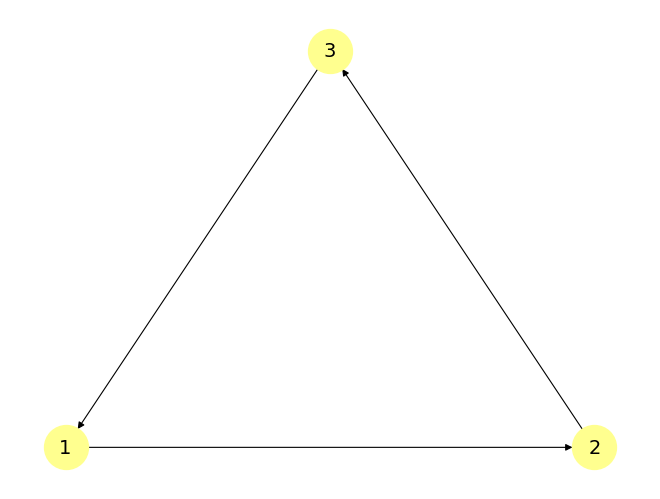

In [2]:
triangle_graph = nx.DiGraph([(1, 2), (2, 3), (3, 1)])
nx.draw_planar(
    triangle_graph,
    with_labels=True,
    node_size=1000,
    node_color="#ffff8f",
    width=0.8,
    font_size=14,
)

### 定义

在数学中，特别是在图论中，有向图（或 DiGraph）是由一组顶点连接的有向边（通常称为弧）组成的图。这里的边具有方向性，这与语义上没有方向概念的无向图形成对比。有向无环图进一步发展了这一概念；通过是无环的，它们不包含任何环。你将在下面的例子中看到这一概念的实际应用。

## 有向无环图

### 示例

In [3]:
clothing_graph = nx.read_graphml(f"data/clothing_graph.graphml")

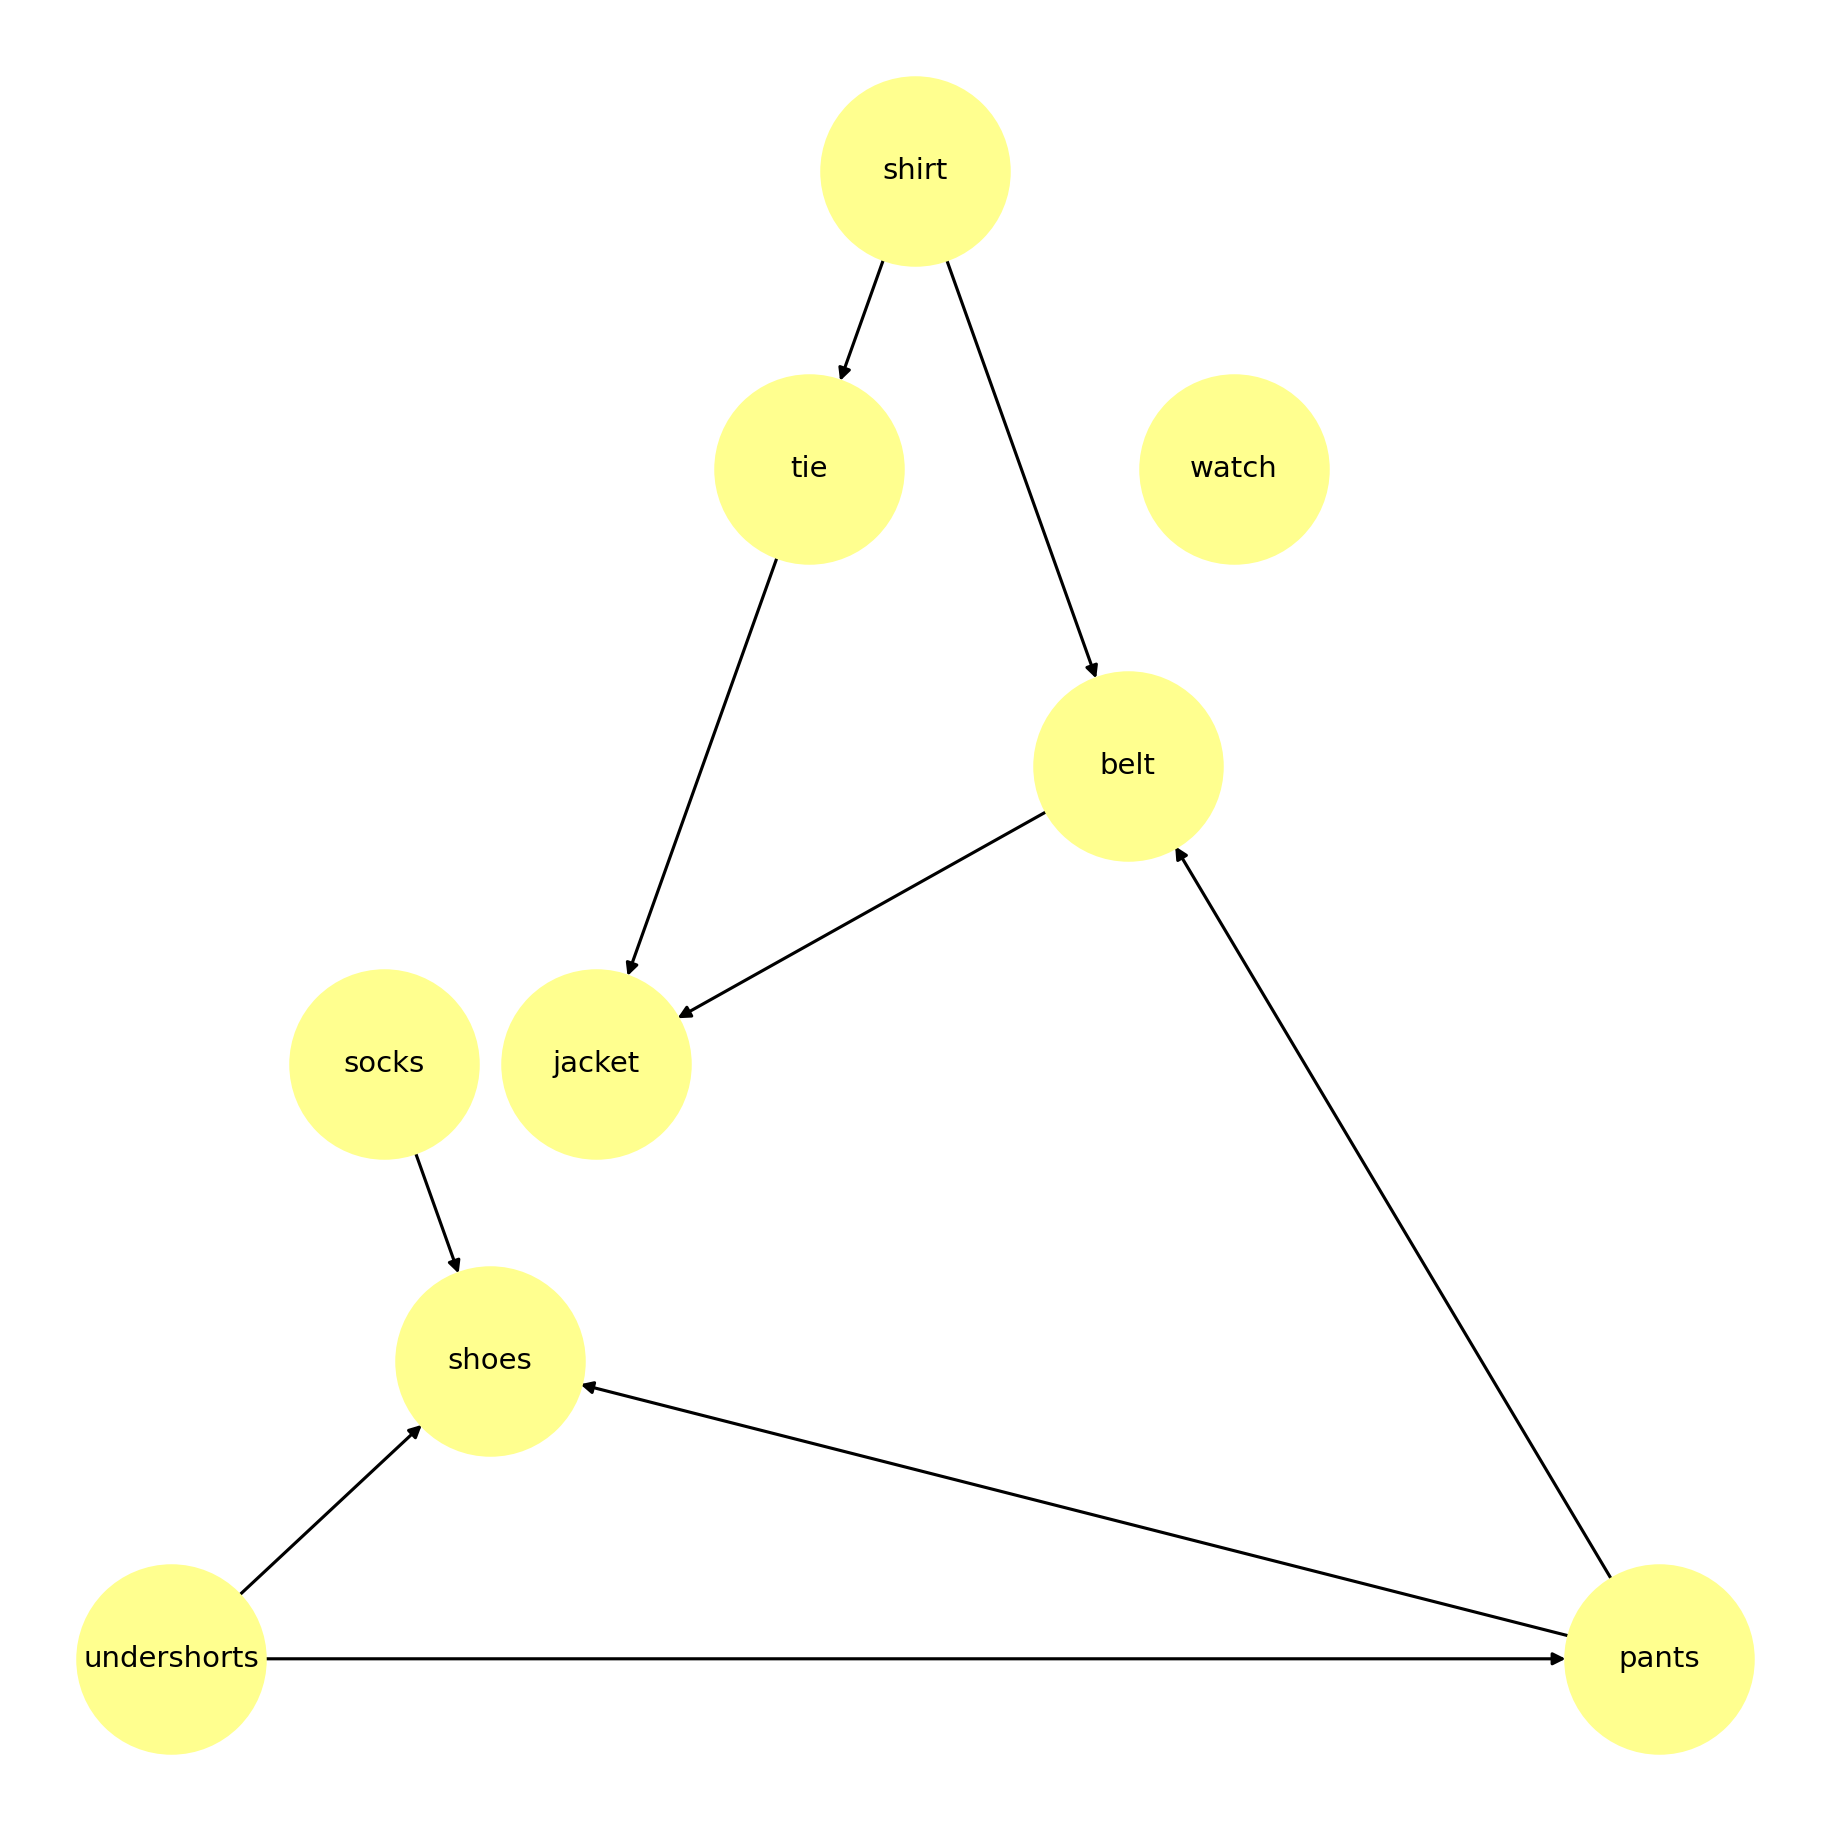

In [4]:
plt.figure(figsize=(12, 12), dpi=150)
nx.draw_planar(
    clothing_graph,
    arrowsize=12,
    with_labels=True,
    node_size=8000,
    node_color="#ffff8f",
    linewidths=2.0,
    width=1.5,
    font_size=14,
)

这里有一个有趣的例子，教授 Bumstead 有一个早晨穿衣的日常习惯。根据习惯，教授会在穿其他衣物之前先穿上某些衣物（例如，先穿袜子再穿鞋）。其他物品可以按任意顺序穿戴（例如，袜子和裤子）。

示例中的有向边 $(u, v)$ 表示衣物 $u$ 必须在衣物 $v$ 之前穿上。

在这个例子中，`clothing_graph` 是一个 DAG。

In [5]:
nx.is_directed_acyclic_graph(clothing_graph)

True

相比之下，`triangle_graph` 不是一个 DAG。

In [6]:
nx.is_directed_acyclic_graph(triangle_graph)

False

这是因为 `triangle_graph` 包含一个环：

In [7]:
nx.find_cycle(triangle_graph)

[(1, 2), (2, 3), (3, 1)]

### 应用

有向无环图表示部分有序的调度任务系统，这些任务具有顺序约束。这类问题的一个重要类别涉及需要更新的对象集合，例如，在电子表格的一个单元格更改后，计算更新单元格的顺序，或者在源代码更改后，确定需要更新的对象文件。在这些上下文中，我们使用依赖图，该图为每个需要更新的对象设置一个顶点，并在两个对象之间建立一条边，每当其中一个对象需要比另一个对象更早更新时。这种图中的环称为循环依赖，通常是不允许的，因为无法一致地安排循环中涉及的任务。没有循环依赖的依赖图形成 DAG。

有向无环图也可以用来表示处理元素的网络。在这种表示中，数据通过传入边进入处理元素，并通过传出边离开元素。例如，在电子电路设计中，静态组合逻辑块可以表示为计算输入函数的逻辑门的非循环系统，其中函数的输入和输出表示为单独的位。

### 定义

有向无环图（“DAG”或“dag”）是一个没有有向环的有向图。也就是说，它由顶点和边（也称为弧）组成，每条边从一个顶点指向另一个顶点，使得沿着这些方向永远不会形成闭环。

一个有向图是有向无环图当且仅当它可以进行拓扑排序，即通过排列顶点形成一个线性顺序，该顺序与所有边的方向一致。

## 拓扑排序

现在让我们介绍一下拓扑排序是什么。

### 示例

In [8]:
list(nx.topological_sort(clothing_graph))

['undershorts',
 'shirt',
 'socks',
 'watch',
 'pants',
 'tie',
 'belt',
 'shoes',
 'jacket']

### 应用

拓扑排序的经典应用是在基于依赖关系的任务或作业序列中进行调度。
任务由顶点表示，如果任务 $u$ 必须在任务 $v$ 开始之前完成，则存在从 $u$ 到 $v$ 的边（例如，在洗衣服时，洗衣机必须完成才能将衣服放入烘干机）。然后，拓扑排序给出了执行这些任务的顺序。

拓扑排序算法的一个密切相关应用最早是在20世纪60年代初在项目管理的PERT技术 [^1] 背景下研究的。在这个应用中，图的顶点代表项目的里程碑，边代表从一个里程碑到另一个里程碑之间必须执行的任务。拓扑排序构成了在项目中寻找关键路径的线性时间算法的基础，关键路径是一系列控制整个项目进度长度的里程碑和任务。

在计算机科学中，这类应用出现在指令调度、在电子表格中重新计算公式值时的公式单元评估顺序、逻辑合成、确定在Makefile中执行编译任务的顺序、数据序列化以及在链接器中解析符号依赖等方面。它还用于决定在数据库中按什么顺序加载带有外键的表。

### 定义

有向无环图 $G = (V, E)$ 的拓扑排序是其所有顶点的一个线性排序，使得如果 $G$ 包含一条边 $(u, v)$，则在排序中 $u$ 出现在 $v$ 之前。

值得注意的是，如果图包含一个环，则不可能进行线性排序。

将图的拓扑排序视为沿水平线排列其顶点，使得所有有向边从左向右延伸，这样有助于理解。

### Kahn算法

NetworkX 使用 Kahn 算法进行拓扑排序。我们在这里简要介绍一下。

首先，找到一组没有入边的“起始节点”，并将它们插入集合 S；在非空的无环图中至少存在一个这样的节点。然后执行以下步骤：

```
L <- 包含已排序元素的空列表
S <- 所有没有入边的节点集合

while S 不为空 do
    从 S 中移除一个节点 N
    将 N 添加到 L
    对于每个通过边 E 从 N 到 M 的节点 M do
        从图中移除边 E
        如果 M 没有其他入边 then
            将 M 插入 S

if 图中有边 then
    返回错误  # 图至少有一个环
else 
    返回 L  # 一个拓扑排序的顺序
```

### NetworkX 实现

最后，让我们看看拓扑排序在 NetworkX 中是如何实现的。

我们可以看到，Kahn 算法将图分层，使得每一层包含所有依赖项已由前一层节点满足的节点。换句话说，Kahn 算法类似于：
  - 取 DAG 中所有没有依赖的节点，放入列表中。
  - 从 DAG 中“移除”这些节点。
  - 重复这个过程，每一步创建一个新的列表。
因此，拓扑排序简化为以这种方式正确分层图。

这个过程在 `topological_generations()` 函数中实现，`topological_sort()` 函数基于此。

让我们一步一步地看看 `topological_generations()` 函数在 NetworkX 中是如何实现的。

#### 步骤 1. 初始化入度。

由于在 Kahn 算法中我们只对顶点的入度感兴趣，为了保持输入图的结构不变，我们不是移除边，而是减少相应顶点的入度。因此，我们将这些值保存在一个单独的字典 `indegree_map` 中。

```
indegree_map = {v: d for v, d in G.in_degree() if d > 0}
```

#### 步骤 2. 初始化第一层。

在 Kahn 算法的每一步中，我们寻找入度为零的顶点。为了准备算法的第一轮循环迭代，我们可以初始化一个名为 `zero_indegree` 的列表来存放这些节点：

```
zero_indegree = [v for v, d in G.in_degree() if d == 0]
```

#### 步骤 3. 从一层移动到下一层。

现在，我们将展示算法如何从一层移动到下一层。

在循环内部，要考虑的第一代（`this_generation`）是那些入度为零的节点集合。

我们处理当前层在变量 `this_generation` 中的所有顶点，并将下一层存储在变量 `zero_indegree` 中。

对于 `this_generation` 中的每个顶点，我们移除其所有出边。

然后，如果某个顶点的入度因此变为零，则将其添加到下一层 `zero_indegree` 中，并从 `indegree_map` 字典中移除。

在我们处理完 `this_generation` 中的所有节点后，我们可以将其返回。
```
while zero_indegree:
    this_generation = zero_indegree
    zero_indegree = []
    for node in this_generation:
        for child in G.neighbors(node):
            indegree_map[child] -= 1

            if indegree_map[child] == 0:
                zero_indegree.append(child)
                del indegree_map[child]

    yield this_generation
```
#### 步骤 4. 检查图中是否存在环。

如果在完成循环后，图中仍有顶点存在，那么图中就存在环，该图不是一个有向无环图（DAG）。

```
if indegree_map:
    raise nx.NetworkXUnfeasible(
        "图中包含一个环或图在迭代过程中发生了变化"
    )
```

#### 附录：拓扑排序同样适用于多重图。

通过稍微修改上述算法，这是可以实现的。

* 首先，检查 `G` 是否为多重图
  ```
  multigraph = G.is_multigraph()
  ```

* 然后，将
  ```
  indegree_map[child] -= 1
  ```
  替换为
  ```
  indegree_map[child] -= len(G[node][child]) if multigraph else 1
  ```

#### 附录：图可能在迭代过程中发生了变化。

在拓扑排序的不同层次传递之间，图可能会发生变化。我们需要在 `while` 循环运行时检查这一点。

* 为此，只需将
  ```
  for node in this_generation:
      for child in G.neighbors(node):
          indegree_map[child] -= 1
  ```
  替换为
  ```
  for node in this_generation:
      if node not in G:
          raise RuntimeError("图在迭代过程中发生了变化")
      for child in G.neighbors(node):
          try:
              indegree_map[child] -= 1
          except KeyError as e:
              raise RuntimeError("图在迭代过程中发生了变化") from e
  ```

#### 合并所有步骤。

将上述所有步骤合并，就得到了 NetworkX 中 `topological_generations()` 函数的当前实现。

In [9]:
print(inspect.getsource(nx.topological_generations))

@nx._dispatchable
def topological_generations(G):
    """Stratifies a DAG into generations.

    A topological generation is node collection in which ancestors of a node in each
    generation are guaranteed to be in a previous generation, and any descendants of
    a node are guaranteed to be in a following generation. Nodes are guaranteed to
    be in the earliest possible generation that they can belong to.

    Parameters
    ----------
    G : NetworkX digraph
        A directed acyclic graph (DAG)

    Yields
    ------
    sets of nodes
        Yields sets of nodes representing each generation.

    Raises
    ------
    NetworkXError
        Generations are defined for directed graphs only. If the graph
        `G` is undirected, a :exc:`NetworkXError` is raised.

    NetworkXUnfeasible
        If `G` is not a directed acyclic graph (DAG) no topological generations
        exist and a :exc:`NetworkXUnfeasible` exception is raised.  This can also
        be raised if `G` is chan

最后，让我们看看在 `clothing_graph` 上的结果会是什么。

In [10]:
list(nx.topological_generations(clothing_graph))

[['undershorts', 'shirt', 'socks', 'watch'],
 ['pants', 'tie'],
 ['belt', 'shoes'],
 ['jacket']]

## 参考文献

[^1]: [维基百科, PERT 技术](https://en.wikipedia.org/wiki/Program_evaluation_and_review_technique)